In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('adult.csv')
df_clean = pd.read_csv('adult_clean.csv')

### Distribution des données numériques

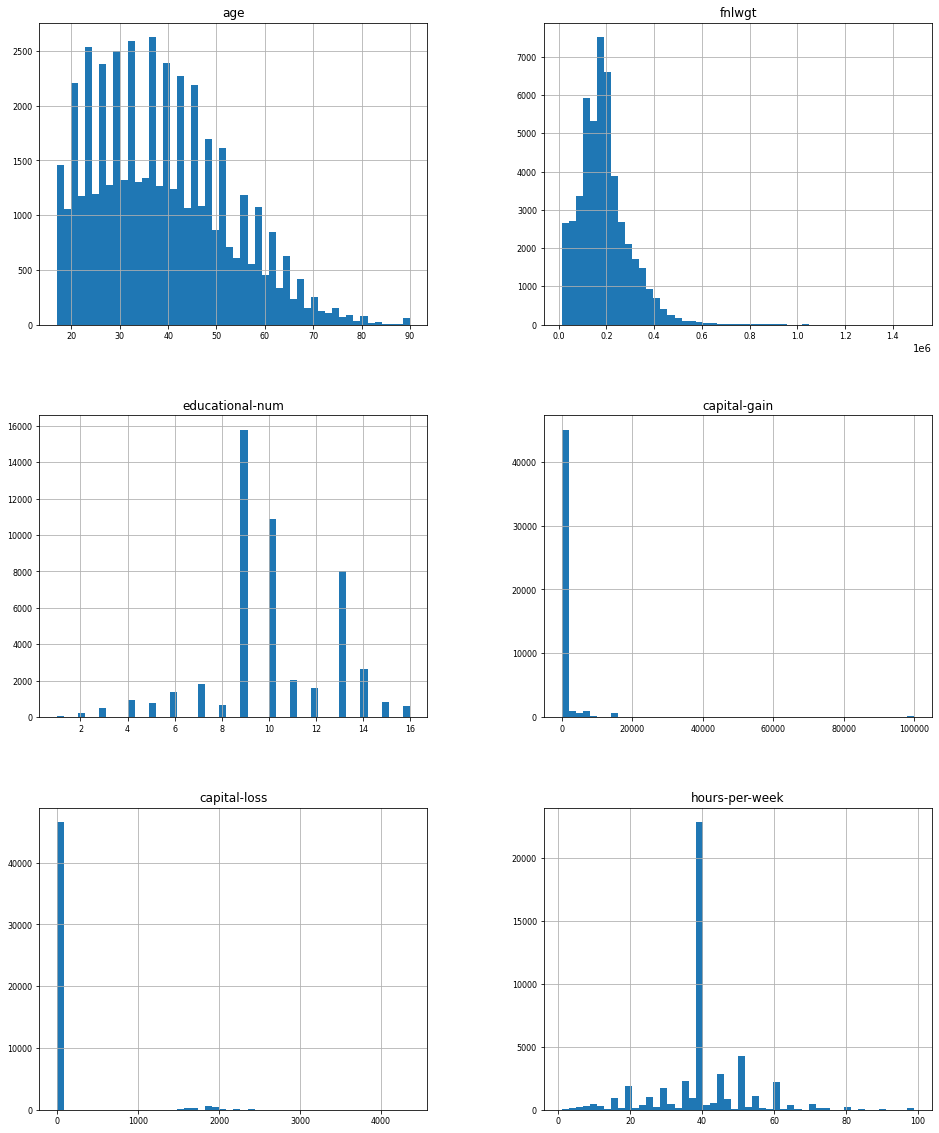

In [4]:
# histogrammes

df_nums = df.select_dtypes(include = ['int64', 'float64'])

df_nums.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

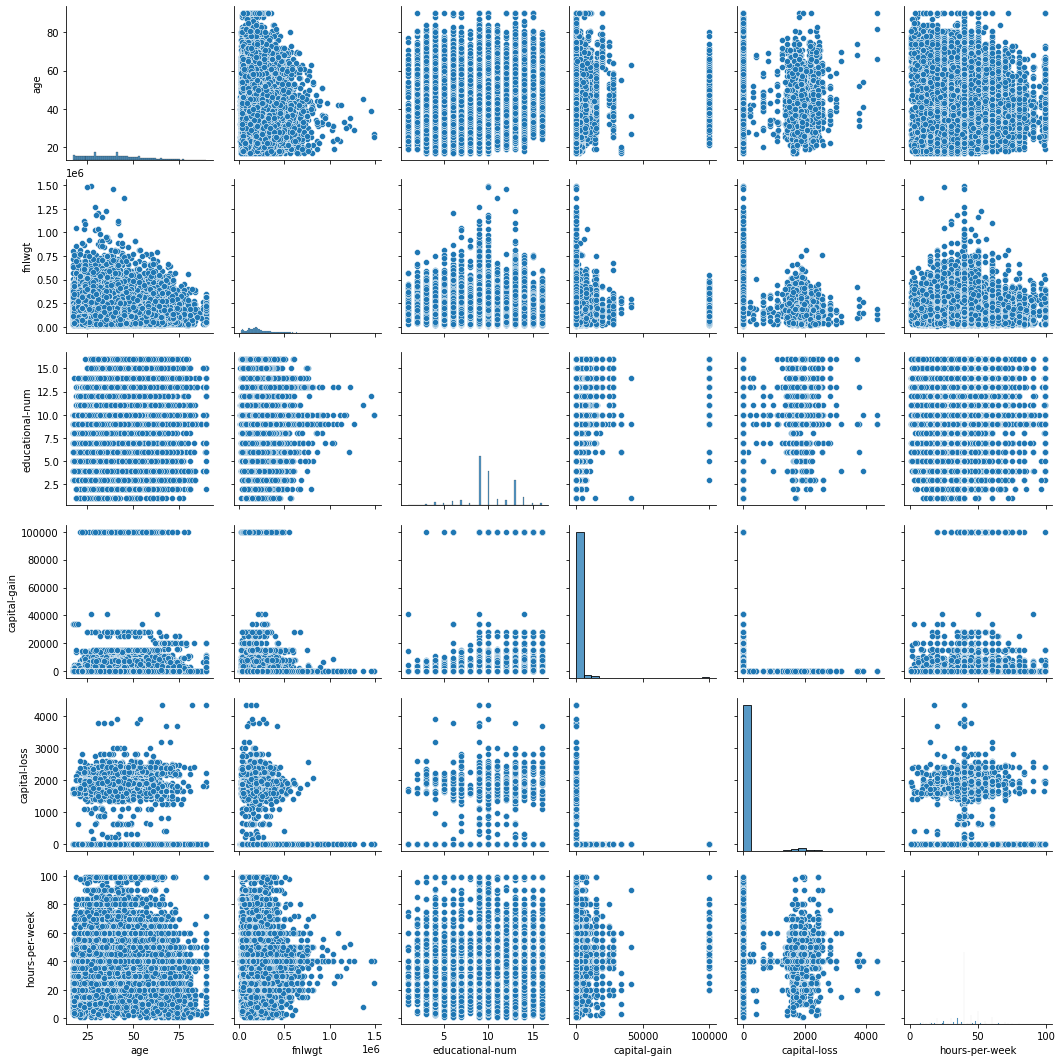

In [5]:
# correlation

sns.pairplot(df)

<AxesSubplot:>

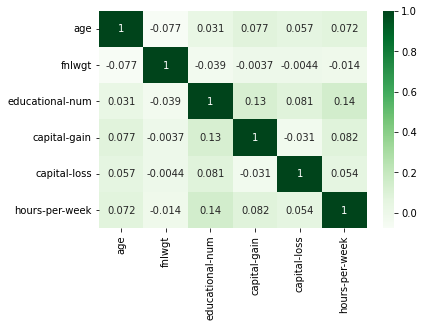

In [6]:
sns.heatmap(df.corr(), annot= True, cmap = "Greens")

percentage population making under 50K:  76.072 %
percentage population making under 50K:  23.928 %


/home/yukikongju/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


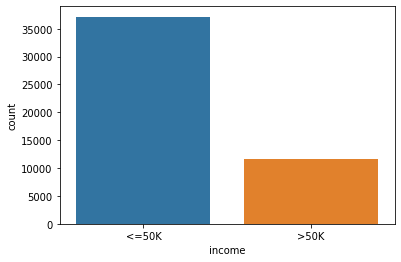

In [7]:
sns.countplot(df["income"])
print("percentage population making under 50K: ", round(len(df[df["income"] == "<=50K"]) / len(df)*100, 3), "%")
print("percentage population making under 50K: ", round(len(df[df["income"] == ">50K"]) / len(df)*100, 3), "%")

### Feature: Capital Gain and Capital Loss

Le nombre d'individus ayant fait des placements est:      0.08


/home/yukikongju/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


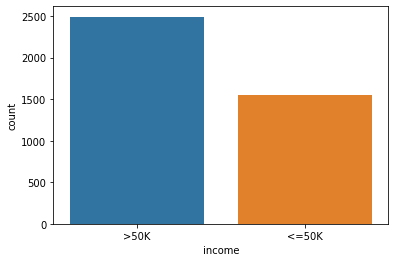

In [8]:
# Y-a-t-il une difference entre les gens qui investissent et qui n'investissent pas

investors = df[df['capital-gain'] != 0]
sns.countplot(investors["income"])

print(f"Le nombre d'individus ayant fait des placements est:\
      {round(len(investors)/len(df), 2)}")

makes_50K = df['income'] == ">50K"
is_investing = df['capital-gain'] != 0

# ratio_rich_investors = 


### Feature - Education

#### Avant le nettoyage

,education,income,Percent
0,10th,<=50K,93.736501
1,10th,>50K,6.263499
2,11th,<=50K,94.922737
3,11th,>50K,5.077263
4,12th,<=50K,92.694064
5,12th,>50K,7.305936
6,1st-4th,<=50K,96.761134
7,1st-4th,>50K,3.238866
8,5th-6th,<=50K,94.695481
9,5th-6th,>50K,5.304519


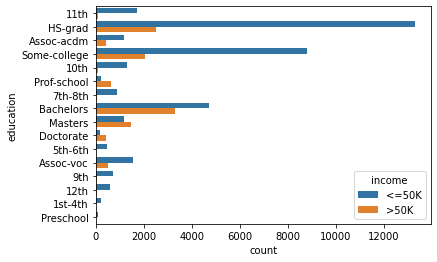

In [9]:
# affichage
sns.countplot(y=df['education'], hue=df['income'])

# pourcentage d'individus faisant plus de 50K selon leur niveau d'education
education_ratios = df.groupby(by=['education'])['income'].value_counts(normalize=True)
education_ratios = education_ratios.mul(100).rename('Percent').reset_index()
education_ratios
# education_ratios.sort_values(by=['education'])

#### Après le nettoyage

education     income
associate     <=50K     0.739683
              >50K      0.260317
bachelor      <=50K     0.579839
              >50K      0.420161
below-hs      <=50K     0.940198
              >50K      0.059802
doctorate     >50K      0.745673
              <=50K     0.254327
highschool    <=50K     0.836561
              >50K      0.163439
master        >50K      0.554318
              <=50K     0.445682
some-college  <=50K     0.798928
              >50K      0.201072
Name: income, dtype: float64

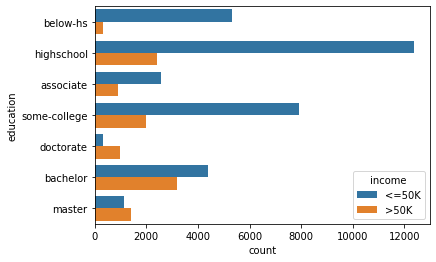

In [10]:
# affichage
sns.countplot(y=df_clean['education'], hue=df_clean['income'])

# pourcentage d'individus faisant plus de 50K selon leur education
occupation_pourcentage = df_clean.groupby(by=['education'])['income'].value_counts(normalize=True)
occupation_pourcentage

### Feature - Native Country

'native-country              income\n?                           >50K      0.256709\n                            <=50K     0.743291\nCambodia                    >50K      0.321429\n                            <=50K     0.678571\nCanada                      >50K      0.346154\n                            <=50K     0.653846\nChina                       >50K      0.295082\n                            <=50K     0.704918\nColumbia                    >50K      0.047059\n                            <=50K     0.952941\nCuba                        >50K      0.246377\n                            <=50K     0.753623\nDominican-Republic          >50K      0.048544\n                            <=50K     0.951456\nEcuador                     >50K      0.133333\n                            <=50K     0.866667\nEl-Salvador                 >50K      0.070968\n                            <=50K     0.929032\nEngland                     >50K      0.370079\n                            <=50K     0.629921\nFra

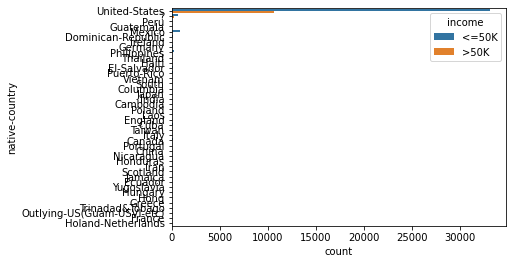

In [11]:
# Proportion d'individus gagnant plus de 50K selon leur pays d'origine

sns.countplot(y=df['native-country'], hue=df['income'])
df.groupby(by=['native-country'])['income'].value_counts(normalize=True, ascending=True).to_string()

native-country  income
moyen           >50K      0.291096
                <=50K     0.708904
pauvre          >50K      0.113882
                <=50K     0.886118
riche           >50K      0.255020
                <=50K     0.744980
Name: income, dtype: float64

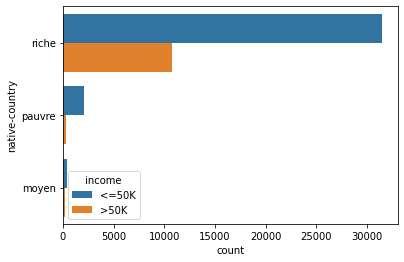

In [12]:
# après nettoyage

# Proportion d'individus gagnant plus de 50K selon leur pays d'origine

sns.countplot(y=df_clean['native-country'], hue=df_clean['income'])
df_clean.groupby(by=['native-country'])['income'].value_counts(normalize=True, ascending=True)

### Feature - Age

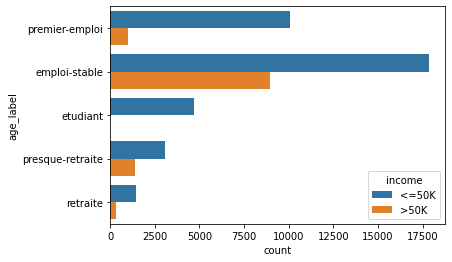

In [13]:
def label_age(age):
    if age >= 16 and age <=21:
        return 'etudiant'
    elif age >= 22 and age <= 30:
        return 'premier-emploi'
    elif age >= 31 and age <= 55:
        return 'emploi-stable'
    elif age >=56 and age <=65:
        return 'presque-retraite'
    return 'retraite'

df['age_label']= df['age'].apply(lambda x: label_age(x))

sns.countplot(y=df['age_label'], hue=df['income'])
age_label_ratio = df.groupby(by=['age_label'])['income'].value_counts(normalize=True)
age_ratio = df.groupby(by=['age'])['income'].value_counts(normalize=True)
age_ratio = age_ratio.mul(100).rename('Percent').reset_index()

In [14]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(age_ratio)

pd.reset_option("max_rows", "min_rows")

# df.groupby(['age'])['income']
# .rename_axis('unique_vals').reset_index(name='counts')

     age income     Percent
0     17  <=50K  100.000000
1     18  <=50K  100.000000
2     19  <=50K   99.715100
3     19   >50K    0.284900
4     20  <=50K   99.910153
5     20   >50K    0.089847
6     21  <=50K   99.452555
7     21   >50K    0.547445
8     22  <=50K   98.556876
9     22   >50K    1.443124
10    23  <=50K   98.344620
11    23   >50K    1.655380
12    24  <=50K   96.351575
13    24   >50K    3.648425
14    25  <=50K   93.640167
15    25   >50K    6.359833
16    26  <=50K   92.627927
17    26   >50K    7.372073
18    27  <=50K   90.665584
19    27   >50K    9.334416
20    28  <=50K   86.015625
21    28   >50K   13.984375
22    29  <=50K   83.810303
23    29   >50K   16.189697
24    30  <=50K   80.672926
25    30   >50K   19.327074
26    31  <=50K   79.245283
27    31   >50K   20.754717
28    32  <=50K   76.376696
29    32   >50K   23.623304
30    33  <=50K   78.277154
31    33   >50K   21.722846
32    34  <=50K   72.831926
33    34   >50K   27.168074
34    35  <=50K   74

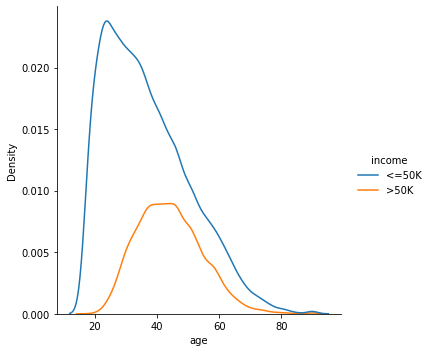

In [15]:
# affichage du nombre d'individu en fonction de age
age_courbe = sns.displot(df_clean, x=df_clean['age'], hue=df_clean['income'], kind="kde")
age_courbe

In [21]:
# https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb
age_ratio = df.groupby(by=['age'])['income'].value_counts(normalize=True)
age_ratio = age_ratio.mul(100).rename('Percent').reset_index()
age_ratio
g = sns.catplot(x='age', y='Percent', hue='income', kind='bar', 
                data = age_ratio)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(1)) + '%'
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

,age,income,Percent
0,17,<=50K,100.000000
1,18,<=50K,100.000000
2,19,<=50K,99.715100
3,19,>50K,0.284900
4,20,<=50K,99.910153
...,...,...,...
137,88,<=50K,83.333333
138,88,>50K,16.666667
139,89,<=50K,100.000000
140,90,<=50K,76.363636


In [1]:
#après nettoyage

# affichage
sns.countplot(y=df_clean['age'], hue=df_clean['income'])

# pourcentage d'individus faisant plus de 50K selon leur age
age_pourcentage = df_clean.groupby(by=['age'])['income'].value_counts(normalize=True)
age_pourcentage

NameError: name 'sns' is not defined

### Feature - Race

#### Avant le nettoyage

race                income
Amer-Indian-Eskimo  <=50K     0.882979
                    >50K      0.117021
Asian-Pac-Islander  <=50K     0.730744
                    >50K      0.269256
Black               <=50K     0.879189
                    >50K      0.120811
Other               <=50K     0.876847
                    >50K      0.123153
White               <=50K     0.746013
                    >50K      0.253987
Name: income, dtype: float64

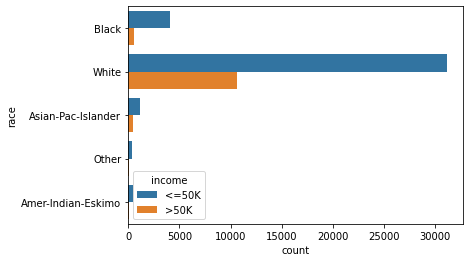

In [18]:
# affichage
sns.countplot(y=df['race'], hue=df['income'])

# pourcentage d'individus faisant plus de 50K selon leur race
race_pourcentage = df.groupby(by=['race'])['income'].value_counts(normalize=True)
race_pourcentage

#### Après le nettoyage

race       income
bipoc      <=50K     0.873978
           >50K      0.126022
non-bipoc  <=50K     0.736803
           >50K      0.263197
Name: income, dtype: float64

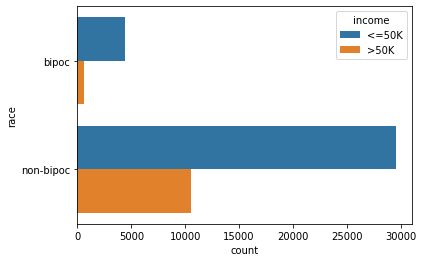

In [19]:
# affichage
sns.countplot(y=df_clean['race'], hue=df_clean['income'])

# pourcentage d'individus faisant plus de 50K selon leur race
race_pourcentage = df_clean.groupby(by=['race'])['income'].value_counts(normalize=True)
race_pourcentage

### Feature - Occupation

#### Avant le nettoyage

occupation         income
?                  <=50K     0.905660
                   >50K      0.094340
Adm-clerical       <=50K     0.863126
                   >50K      0.136874
Armed-Forces       <=50K     0.666667
                   >50K      0.333333
Craft-repair       <=50K     0.773724
                   >50K      0.226276
Exec-managerial    <=50K     0.522182
                   >50K      0.477818
Farming-fishing    <=50K     0.883893
                   >50K      0.116107
Handlers-cleaners  <=50K     0.933398
                   >50K      0.066602
Machine-op-inspct  <=50K     0.876903
                   >50K      0.123097
Other-service      <=50K     0.958562
                   >50K      0.041438
Priv-house-serv    <=50K     0.987603
                   >50K      0.012397
Prof-specialty     <=50K     0.548931
                   >50K      0.451069
Protective-serv    <=50K     0.686673
                   >50K      0.313327
Sales              <=50K     0.732013
                   >50K 

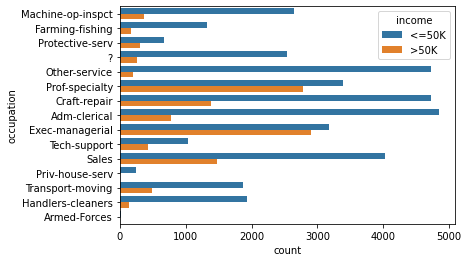

In [20]:
sns.countplot(y=df['occupation'], hue=df['income']) 
df.groupby(by=['occupation'])['income'].value_counts(normalize=True) 

#### Après le nettoyage

occupation       income
Exec-managerial  <=50K     0.520903
                 >50K      0.479097
Priv-house-serv  <=50K     0.986957
                 >50K      0.013043
mixte            <=50K     0.824557
                 >50K      0.175443
primaire         <=50K     0.939580
                 >50K      0.060420
tertiaire        <=50K     0.646808
                 >50K      0.353192
Name: income, dtype: float64

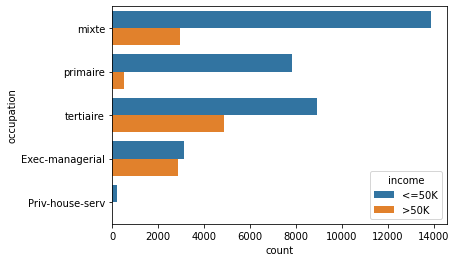

In [25]:
# affichage
sns.countplot(y=df_clean['occupation'], hue=df_clean['income'])

# pourcentage d'individus faisant plus de 50K selon leur occupation
occupation_pourcentage = df_clean.groupby(by=['occupation'])['income'].value_counts(normalize=True)
occupation_pourcentage

### Feature - Workclass

#### Avant le nettoyage

workclass         income
?                 <=50K     0.905323
                  >50K      0.094677
Federal-gov       <=50K     0.608240
                  >50K      0.391760
Local-gov         <=50K     0.704401
                  >50K      0.295599
Never-worked      <=50K     1.000000
Private           <=50K     0.782133
                  >50K      0.217867
Self-emp-inc      >50K      0.553392
                  <=50K     0.446608
Self-emp-not-inc  <=50K     0.721129
                  >50K      0.278871
State-gov         <=50K     0.732458
                  >50K      0.267542
Without-pay       <=50K     0.904762
                  >50K      0.095238
Name: income, dtype: float64

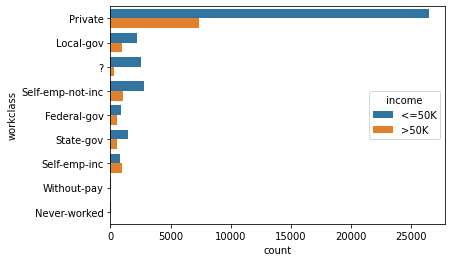

In [18]:
# affichage
sns.countplot(y=df['workclass'], hue=df['income'])

# pourcentage d'individus faisant plus de 50K selon leur workclass
workclass_pourcentage = df.groupby(by=['workclass'])['income'].value_counts(normalize=True)
workclass_pourcentage

#### Après le nettoyage

workclass      income
government     <=50K     0.692498
               >50K      0.307502
jobless        <=50K     0.904762
               >50K      0.095238
private        <=50K     0.782184
               >50K      0.217816
self-employed  <=50K     0.637684
               >50K      0.362316
Name: income, dtype: float64

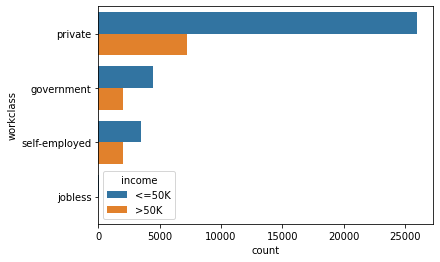

In [19]:
# affichage
sns.countplot(y=df_clean['workclass'], hue=df_clean['income'])

# pourcentage d'individus faisant plus de 50K selon leur workclass
workclass_pourcentage = df_clean.groupby(by=['workclass'])['income'].value_counts(normalize=True)
workclass_pourcentage

### Feature - Relationship

In [11]:
# pourcentage d'individus faisant plus de 50K selon leur relationship
relationship_pourcentage = df.groupby(by=['relationship'])['income'].value_counts(normalize=True)
relationship_pourcentage

relationship    income
Husband         <=50K     0.551329
                >50K      0.448671
Not-in-family   <=50K     0.898593
                >50K      0.101407
Other-relative  <=50K     0.965471
                >50K      0.034529
Own-child       <=50K     0.985358
                >50K      0.014642
Unmarried       <=50K     0.939707
                >50K      0.060293
Wife            <=50K     0.531103
                >50K      0.468897
Name: income, dtype: float64

### Feature - Marital-status

marital-status         income
Divorced               <=50K     0.898839
                       >50K      0.101161
Married-AF-spouse      <=50K     0.621622
                       >50K      0.378378
Married-civ-spouse     <=50K     0.553867
                       >50K      0.446133
Married-spouse-absent  <=50K     0.907643
                       >50K      0.092357
Never-married          <=50K     0.954520
                       >50K      0.045480
Separated              <=50K     0.935294
                       >50K      0.064706
Widowed                <=50K     0.915679
                       >50K      0.084321
Name: income, dtype: float64

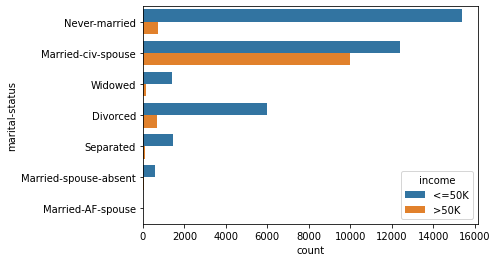

In [42]:
# avant nettoyage

# affichage
sns.countplot(y=df['marital-status'], hue=df['income'])

# pourcentage d'individus faisant plus de 50K selon leur workclass
marital_pourcentage = df.groupby(by=['marital-status'])['income'].value_counts(normalize=True)
marital_pourcentage

marital-status         income
Divorced               <=50K     0.895933
                       >50K      0.104067
Married-AF-spouse      <=50K     0.562500
                       >50K      0.437500
Married-civ-spouse     <=50K     0.545766
                       >50K      0.454234
Married-spouse-absent  <=50K     0.902174
                       >50K      0.097826
Never-married          <=50K     0.951878
                       >50K      0.048122
Separated              <=50K     0.929837
                       >50K      0.070163
Widowed                <=50K     0.905247
                       >50K      0.094753
Name: income, dtype: float64

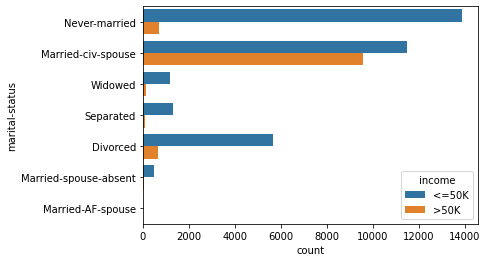

In [43]:
# après nettoyage et classification

# affichage
sns.countplot(y=df_clean['marital-status'], hue=df_clean['income'])

# pourcentage d'individus faisant plus de 50K selon leur workclass
marital_pourcentage = df_clean.groupby(by=['marital-status'])['income'].value_counts(normalize=True)
marital_pourcentage

### Feature - Hours-per-week

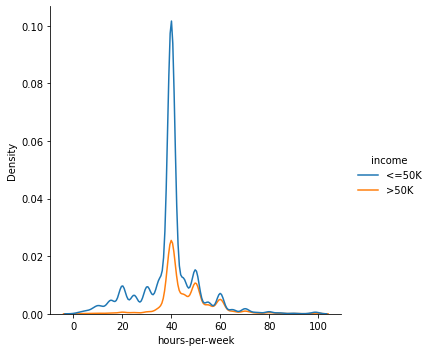

In [29]:
# affichage du nombre d'individu en fonction de hours-per-week
sns.displot(df_clean, x=df_clean['hours-per-week'], hue=df_clean['income'], kind="kde")

/home/yukikongju/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


     hours-per-week income    Percent
0                 1  <=50K  83.333333
1                 1   >50K  16.666667
2                 2  <=50K  87.500000
3                 2   >50K  12.500000
4                 3  <=50K  94.285714
..              ...    ...        ...
176              97   >50K  50.000000
177              98  <=50K  78.571429
178              98   >50K  21.428571
179              99  <=50K  67.479675
180              99   >50K  32.520325

[181 rows x 3 columns]


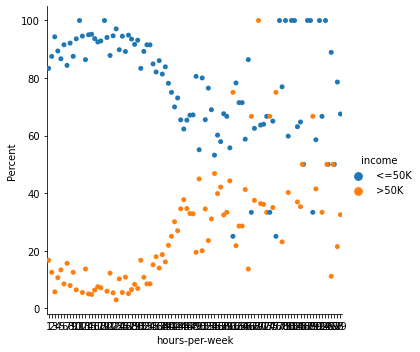

In [75]:
# après le nettoyage et la classification

# pourcentage d'individus faisant plus de 50K selon hours-per-week
hpw_pourcentage = df_clean.groupby(by=['hours-per-week'])['income'].value_counts(normalize=True)
hpw_pourcentage = hpw_pourcentage.mul(100).rename('Percent').reset_index()

g = sns.catplot(x='hours-per-week', y='Percent', hue='income', kind='swarm', 
                data = hpw_pourcentage)

print(hpw_pourcentage)